# Content and Objective

+ Show approximations by using gaussian approximation
+ Additionally, applying Gram-Schmidt for "orthonormalizing" a set of functions

In [12]:
# importing
import numpy as np
import scipy.signal
import scipy as sp

import sympy as sym
from sympy.plotting import plot


### definitions

In [13]:
# define symbol
x = sym.Symbol('x')

In [14]:
# function to be approximated
f = sym.cos( x )
#f = sym.exp( x )
#f = sym.sqrt( x )

# define lower and upper bound for L[a,b] 
# -> might be relevant to be changed if you are adapting the function to be approximated
a = -5
b = 5

### Define Gram-Schmidt

In [15]:
# basis and their number of functions
M = [ x**c for c in range( 0, 4 ) ]

n = len( M )
print(M)

[1, x, x**2, x**3]


In [16]:
# apply Gram-Schmidt for user-defined set M 

# init ONB
ONB = [ ]

# loop for new functions and apply Gram-Schmidt
for _n in range( n ):
   
    # get function
    f_temp = M[ _n ]
    
    # subtract influence of past ONB functions
    if _n >= 1:
        for _k in range( _n ):
            f_temp -= sym.integrate( M[ _n ] * ONB[ _k ], (x,a,b) ) * ONB[ _k ]
            
    # get norm
    norm = float( sym.integrate( f_temp * f_temp , (x,a,b) ) )
    
    # return normalized function
    ONB.append( f_temp / np.sqrt( norm) )

In [17]:
print(ONB)

[0.316227766016838, 0.109544511501033*x, 0.0424264068711929*x**2 - 0.353553390593274, 0.0167332005306815*x**3 - 0.250998007960223*x]


In [18]:
# opt in if you like to see the correlation matrix
if 1:
    corr_matrix = np.zeros( ( n, n ) )

    for _m in range( n ):
        for _n in range( n ):
            corr_matrix[ _m, _n ] = float( sym.integrate( ONB[_m] * ONB[_n], (x,a,b) ) )

    np.set_printoptions(precision=2)
    corr_matrix[ np.isclose( corr_matrix, 0 ) ] = 0

    print( corr_matrix )        

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


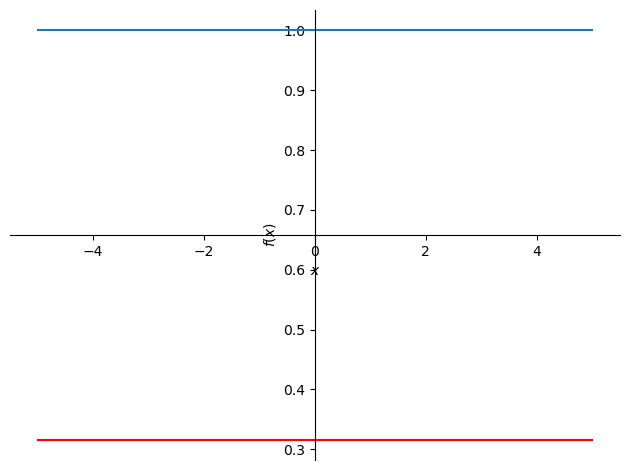

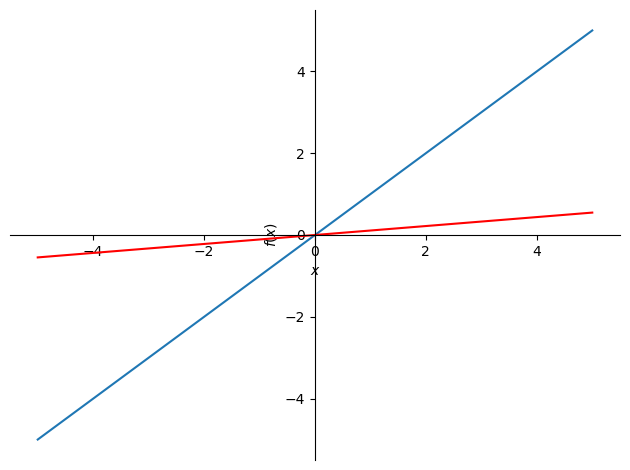

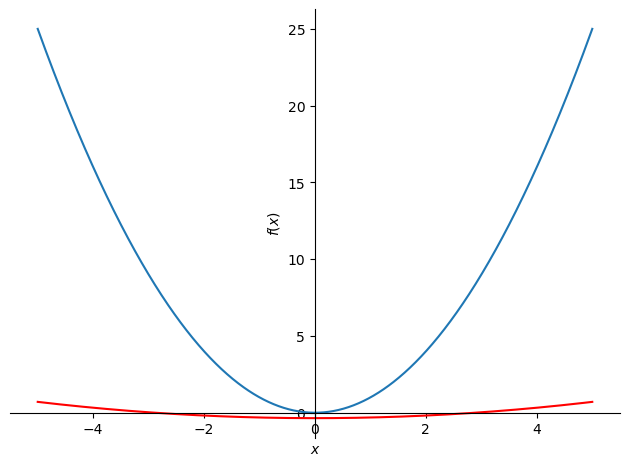

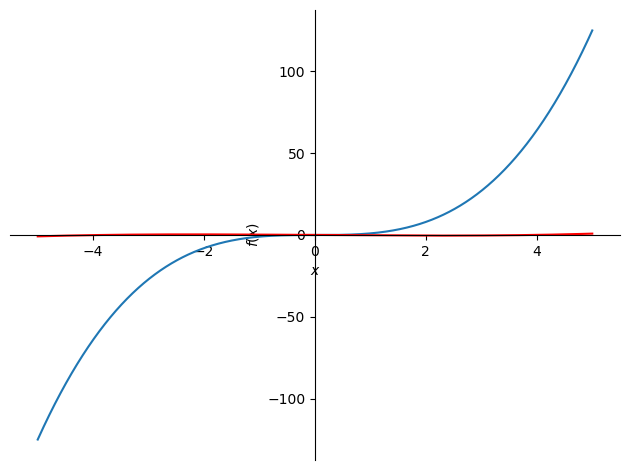

In [19]:
# opt in if you like to see figures of the base functions
# NOTE: Become unhandy if it's too many of them
if 1:
    for _n in range( n):
        p = plot( M[_n], (x,a,b), show=False )
        p.extend( plot( ONB[_n], (x,a,b), line_color='r', show=False ) )

        p.show()

### now approximate a function

In [20]:
# init approx and extend successively
approx = 0

# add next ONB function with according coefficient
for _n in range( n ):
    
    coeff = sym.integrate( f * ONB[ _n ], (x,a,b) )
    approx += coeff * ONB[ _n ]

# if you like to see the function
print( approx )

(0.0424264068711929*x**2 - 0.353553390593274)*(1.24450793488832*sin(5) + 0.848528137423857*cos(5)) + 0.2*sin(5)


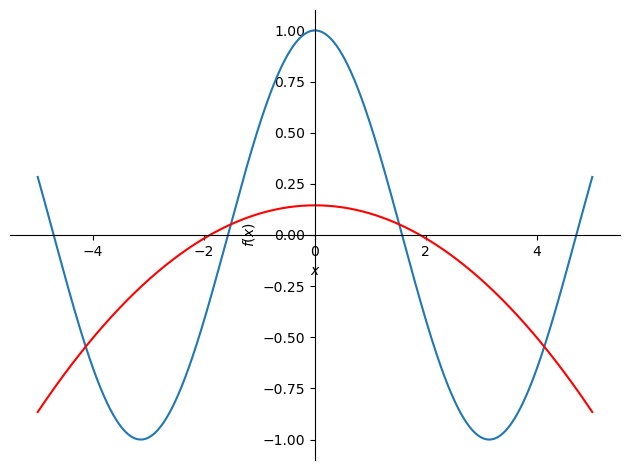

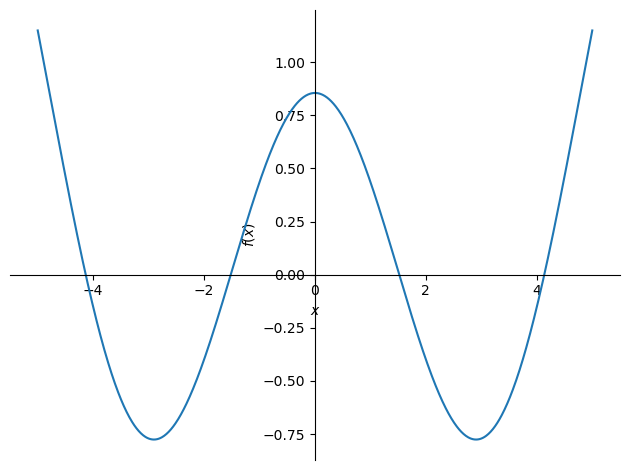

In [21]:
p = plot( f, (x,a,b), show=False) 
p.extend( plot( approx, (x,a,b), line_color='r', show=False) )
p.show()

plot( f - approx, (x,a,b) )